# Importing important libraries 

In [15]:
from keras.datasets import mnist

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline

## Loading the MNIST dataset

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# reshaping the data 
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

In [ ]:
# normalizing the data
X_train = X_train/255
X_test = X_test/255

In [ ]:
# Shuffle Split cross validation with 10 splits and 20% data set aside for model evaluation as a test data
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

In [ ]:
def train_classifiers(estimator, X_train, y_train, cv, name):
  estimator.fit(X_train, y_train)
  cv_train_score = cross_val_score(estimator, X_train, y_train, cv=cv, scoring='f1_macro')

  print(f'On an average {name} model has an average f1 score of {cv_train_score.mean():.3f} +- {cv_train_score.std():.3f} on the training set')

In [ ]:
def eval(estimator, X_test, y_test):
  y_pred = estimator.predict(X_test)

  print (f'# Classification report: ')
  print(classification_report(y_test, y_pred))
  
  print(f'# Confusion matrix display: ')
  disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
  disp.plot()
  plt.title('Confusion Matrix')
  plt.show

## AdaBoost for MNIST multiclass classification:

In [ ]:
abc_pipeline = Pipeline( [('classifier', AdaBoostClassifier()) ])
train_classifiers(abc_pipeline,X_train,y_train,cv, "AdaBoost Classifier")

On an average AdaBoost Classifier model has an average f1 score of 0.712 +- 0.016 on the training set


# Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       980
           1       0.85      0.94      0.90      1135
           2       0.79      0.58      0.67      1032
           3       0.68      0.67      0.68      1010
           4       0.72      0.72      0.72       982
           5       0.69      0.59      0.64       892
           6       0.72      0.86      0.78       958
           7       0.68      0.78      0.73      1028
           8       0.66      0.68      0.67       974
           9       0.62      0.55      0.58      1009

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.73     10000

# Confusion matrix display: 


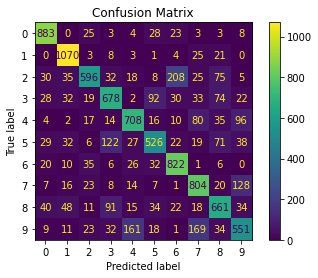

In [ ]:
eval(abc_pipeline, X_test, y_test)

## Gradient Boost for MNIST multiclass classification:

In [ ]:
gbc_pipeline = Pipeline( [('classifier', GradientBoostingClassifier()) ])
train_classifiers(gbc_pipeline,X_train,y_train,cv, "GradientBoosting Classifier")

In [ ]:
eval(gbc_pipeline, X_test, y_test)

## XGBoost for MNIST multiclass classification:

In [ ]:
xbc_pipeline = Pipeline( [('classifier', XGBClassifier()) ])
train_classifiers(xbc_pipeline,X_train,y_train,cv, "XGBoost Classifier")

In [ ]:
eval(xbc_pipeline, X_test, y_test)